<a href="https://colab.research.google.com/github/alorrojayann/temp-humid-air-quality-monitor/blob/main/(Alorro)_Case_Study_No_1_%7C_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study No. 1 | Regression**

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr>|<hr>
**ACTIVITY** | **Case Study 1**
**Members** | Alorro, Jay-ann
**Section** | CPE31S31
**Date Performed**: | 12/11/24
**Date Submitted**: | 12/11/24
**Instructor**: | Dr. Alonica Villanueva

<hr>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Individual Datasets



*   Data Cleaning
*   Adding (1) Open, (2) Closed labels



Building 3

In [ ]:
b3 = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/Building3_TempHumidGas.csv')
b3.head()

,Date,Temperature,Humidity,Air_quality
0,2024-11-04 9:25,30.10,85.0,420.99
1,2024-11-04 9:30,29.98,85.5,410.75
2,2024-11-04 9:36,37.38,107.5,534.21
3,2024-11-04 9:41,37.35,107.5,499.42
4,2024-11-04 9:47,37.45,107.5,521.48


In [ ]:
b3.dtypes

,0
Date,object
Temperature,float64
Humidity,float64
Air_quality,float64


In [ ]:
# changing column name
b3_new = b3.rename(columns={'Air_quality': 'Air Quality'})
b3_new.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 9:25,30.10,85.0,420.99
1,2024-11-04 9:30,29.98,85.5,410.75
2,2024-11-04 9:36,37.38,107.5,534.21
3,2024-11-04 9:41,37.35,107.5,499.42
4,2024-11-04 9:47,37.45,107.5,521.48


In [ ]:
b3_new.duplicated().sum()

0

In [ ]:
# check for inf values
print(b3_new[['Temperature', 'Humidity', 'Air Quality']].isin([float('inf'), float('-inf')]).sum())

Temperature    0
Humidity       0
Air Quality    1
dtype: int64


In [ ]:
b3_new[['Temperature', 'Humidity', 'Air Quality']] = b3_new[['Temperature', 'Humidity', 'Air Quality']].replace([float('inf'), float('-inf')], float('nan'))

In [ ]:
b3_new.isna().sum()

,0
Date,0
Temperature,0
Humidity,0
Air Quality,2


In [ ]:
# calculate the average 'Air Quality' value, excluding NaN values
average_air_quality = b3_new['Air Quality'].mean(skipna=True)

# fill NaN values in the 'Air Quality' column with the calculated average
b3_new['Air Quality'].fillna(average_air_quality, inplace=True)

b3_new.isna().sum()

<ipython-input-200-fcfd55aaaebf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b3_new['Air Quality'].fillna(average_air_quality, inplace=True)


,0
Date,0
Temperature,0
Humidity,0
Air Quality,0


In [ ]:
b3_new.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 9:25,30.10,85.0,420.99
1,2024-11-04 9:30,29.98,85.5,410.75
2,2024-11-04 9:36,37.38,107.5,534.21
3,2024-11-04 9:41,37.35,107.5,499.42
4,2024-11-04 9:47,37.45,107.5,521.48


In [ ]:
# convert to datetime format
b3_new['Date'] = pd.to_datetime(b3_new['Date'])

In [ ]:
# format to 24-hour format
b3_new['Date'] = b3_new['Date'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
# adding Open/Closed column ((1) Open, (2) Closed)
b3_new['Open/Closed'] = 2
b3_new.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 09:25,30.10,85.0,420.99,2
1,2024-11-04 09:30,29.98,85.5,410.75,2
2,2024-11-04 09:36,37.38,107.5,534.21,2
3,2024-11-04 09:41,37.35,107.5,499.42,2
4,2024-11-04 09:47,37.45,107.5,521.48,2


In [ ]:
# export new csv
b3_new.to_csv('b3_new.csv', index=False)

PE Center

In [ ]:
pec = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/PE_Center_AirQualityMonitoring.csv')
pec.head()

,Date,Temperature,Humidity,Air Quality,Unnamed: 4,Unnamed: 5
0,2024-11-04 12:33,28.77,83.0,76.93,NaN,NaN
1,2024-11-04 12:33,28.77,83.0,76.93,NaN,NaN
2,2024-11-04 12:38,28.52,83.8,84.19,NaN,NaN
3,2024-11-04 12:43,28.40,84.0,89.28,NaN,NaN
4,2024-11-04 12:44,28.40,84.0,89.28,NaN,NaN


In [ ]:
pec.dtypes

,0
Date,object
Temperature,float64
Humidity,float64
Air Quality,float64
Unnamed: 4,object
Unnamed: 5,object


In [ ]:
# drop unnecessary columns
pec.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)

In [ ]:
pec.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 12:33,28.77,83.0,76.93
1,2024-11-04 12:33,28.77,83.0,76.93
2,2024-11-04 12:38,28.52,83.8,84.19
3,2024-11-04 12:43,28.40,84.0,89.28
4,2024-11-04 12:44,28.40,84.0,89.28


In [ ]:
pec_new = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/new/pec_new (1).csv')
pec_new.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 13:17,35.12,48.33,480.13
1,2024-11-04 13:27,35.74,45.40,428.99
2,2024-11-04 13:42,35.60,46.17,445.87
3,2024-11-04 13:50,36.03,45.50,451.22
4,2024-11-04 14:00,35.88,44.20,474.32


In [ ]:
pec_new.columns

Index(['Date', 'Temperature', 'Humidity', 'Air Quality'], dtype='object')

In [ ]:
# convert to datetime format
pec_new['Date'] = pd.to_datetime(pec_new['Date'])

In [ ]:
# format to 24-hour format
pec_new['Date'] = pec_new['Date'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
pec_new.duplicated().sum()

0

In [ ]:
# adding Open/Closed column ((1) Open, (2) Closed)
pec_new['Open/Closed'] = 1
pec_new.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 13:17,35.12,48.33,480.13,1
1,2024-11-04 13:27,35.74,45.40,428.99,1
2,2024-11-04 13:42,35.60,46.17,445.87,1
3,2024-11-04 13:50,36.03,45.50,451.22,1
4,2024-11-04 14:00,35.88,44.20,474.32,1


In [ ]:
pec_new.to_csv('pec_new.csv', index=False)

Study Hall

In [ ]:
sh = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/Study_Hall_TempHumidGas_Monitoring.csv')
sh.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 13:17,35.12,48.33,480.13
1,2024-11-04 13:27,35.74,45.40,428.99
2,2024-11-04 13:42,35.60,46.17,445.87
3,2024-11-04 13:50,36.03,45.50,451.22
4,2024-11-04 14:00,35.88,44.20,474.32


In [ ]:
sh.dtypes

,0
Date,object
Temperature,float64
Humidity,float64
Air Quality,float64


In [ ]:
# convert to datetime format
sh['Date'] = pd.to_datetime(sh['Date'])

In [ ]:
# format to 24-hour format
sh['Date'] = sh['Date'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
sh.duplicated().sum()

0

In [ ]:
# adding Open/Closed column ((1) Open, (2) Closed)
sh['Open/Closed'] = 1
sh.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 13:17,35.12,48.33,480.13,1
1,2024-11-04 13:27,35.74,45.40,428.99,1
2,2024-11-04 13:42,35.60,46.17,445.87,1
3,2024-11-04 13:50,36.03,45.50,451.22,1
4,2024-11-04 14:00,35.88,44.20,474.32,1


In [ ]:
sh.to_csv('sh_new.csv', index=False)

Anniversary Hall

In [ ]:
anniv = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/air_quality_monitoring (Garden_Anniversary Hall) - air_quality_data_sheet (1).csv')
anniv.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 12:43:43,30.4,67.83,621.5
1,2024-11-04 12:43:52,30.4,67.83,621.5
2,2024-11-04 12:49:15,31.5,62.60,358.8
3,2024-11-04 12:49:26,31.5,62.60,358.8
4,2024-11-04 12:54:42,31.5,63.20,301.0


In [ ]:
anniv.dtypes

,0
Date,object
Temperature,float64
Humidity,float64
Air Quality,float64


In [ ]:
# convert to date format
anniv['Date'] = pd.to_datetime(anniv['Date'])

In [ ]:
# format datetime column as 'YYYY-MM-DD HH:MM'
anniv['Date'] = anniv['Date'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
anniv.duplicated().sum()

196

In [ ]:
# remove duplicates
anniv = anniv.drop_duplicates()
anniv.duplicated().sum()

0

In [ ]:
# adding Open/Closed column ((1) Open, (2) Closed)
anniv['Open/Closed'] = 1
anniv.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 12:43,30.40,67.83,621.5,1
2,2024-11-04 12:49,31.50,62.60,358.8,1
4,2024-11-04 12:54,31.50,63.20,301.0,1
5,2024-11-04 12:59,31.68,62.60,260.4,1
6,2024-11-04 13:00,31.68,62.60,260.4,1


In [ ]:
anniv.to_csv('anniv_new.csv', index=False)

Library

In [ ]:
lib = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/library(engineering library) temphumidairq - libraryclean.csv')
lib.head()

,Date,Temperature,Humidity,Air Quality
0,2024-11-04 10:39,28.42,41.32,107.62
1,2024-11-04 10:44,28.32,40.96,114.16
2,2024-11-04 10:49,28.38,40.02,137.18
3,2024-11-04 10:54,28.52,40.68,157.71
4,2024-11-04 11:00,28.60,41.28,177.08


In [ ]:
lib.dtypes

,0
Date,object
Temperature,float64
Humidity,float64
Air Quality,float64


In [ ]:
# convert to date format
lib['Date'] = pd.to_datetime(lib['Date'])

In [ ]:
# format datetime column as 'YYYY-MM-DD HH:MM'
lib['Date'] = lib['Date'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
lib.duplicated().sum()

0

In [ ]:
# adding Open/Closed column ((1) Open, (2) Closed)
lib['Open/Closed'] = 2
lib.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 10:39,28.42,41.32,107.62,2
1,2024-11-04 10:44,28.32,40.96,114.16,2
2,2024-11-04 10:49,28.38,40.02,137.18,2
3,2024-11-04 10:54,28.52,40.68,157.71,2
4,2024-11-04 11:00,28.60,41.28,177.08,2


In [ ]:
lib.to_csv('lib_new.csv', index=False)

# Merged Dataset


*   Merging of Datasets
*   Data Cleaning





In [ ]:
import pandas as pd

# filepaths
file_paths = ['/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/anniv_new.csv', '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/b3_new.csv', '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/lib_new.csv', '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/pec_new.csv', '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/sh_new.csv']

# read each csv files and store in a list
dataFrames = [pd.read_csv(file) for file in file_paths]

# concat all df into a single df
merged_df = pd.concat(dataFrames, ignore_index=True)

In [ ]:
merged_df.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 12:43,30.40,67.83,621.5,1
1,2024-11-04 12:49,31.50,62.60,358.8,1
2,2024-11-04 12:54,31.50,63.20,301.0,1
3,2024-11-04 12:59,31.68,62.60,260.4,1
4,2024-11-04 13:00,31.68,62.60,260.4,1


In [ ]:
# export to csv
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/merged_data.csv')
data.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 12:43,30.40,67.83,621.5,1
1,2024-11-04 12:49,31.50,62.60,358.8,1
2,2024-11-04 12:54,31.50,63.20,301.0,1
3,2024-11-04 12:59,31.68,62.60,260.4,1
4,2024-11-04 13:00,31.68,62.60,260.4,1


In [ ]:
data.shape

(2051, 5)

In [ ]:
data.duplicated().sum()

391

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2051 non-null   object 
 1   Temperature  2051 non-null   float64
 2   Humidity     2051 non-null   float64
 3   Air Quality  2051 non-null   float64
 4   Open/Closed  2051 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 80.2+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [ ]:
data.isna().sum()

,0
Date,0
Temperature,0
Humidity,0
Air Quality,0
Open/Closed,0


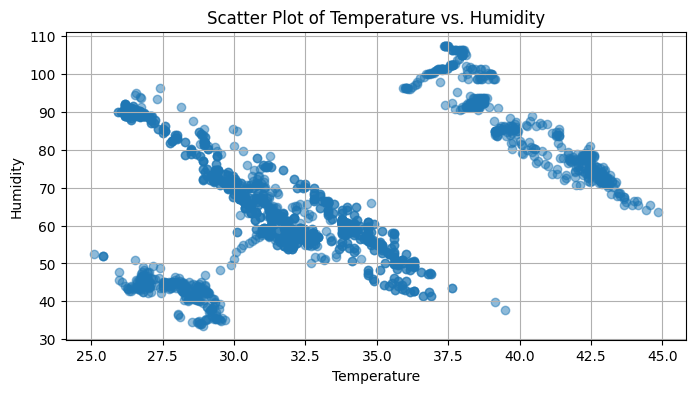

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(data['Temperature'], data['Humidity'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.grid(True)
plt.show()

# Individual Models


In [ ]:
# filepaths of individual data
sh_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/sh_new.csv'
b3_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/b3_new.csv'
lib_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/lib_new.csv'
anniv_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/anniv_new.csv'
pec_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/pec_new.csv'
merged_fp = '/content/drive/MyDrive/CPE 312/Case Study No. 1 | Regression/data/final/merged_data.csv'

### **Building 3**

In [ ]:
b3 = pd.read_csv(b3_fp)
b3.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 09:25,30.10,85.0,420.99,2
1,2024-11-04 09:30,29.98,85.5,410.75,2
2,2024-11-04 09:36,37.38,107.5,534.21,2
3,2024-11-04 09:41,37.35,107.5,499.42,2
4,2024-11-04 09:47,37.45,107.5,521.48,2


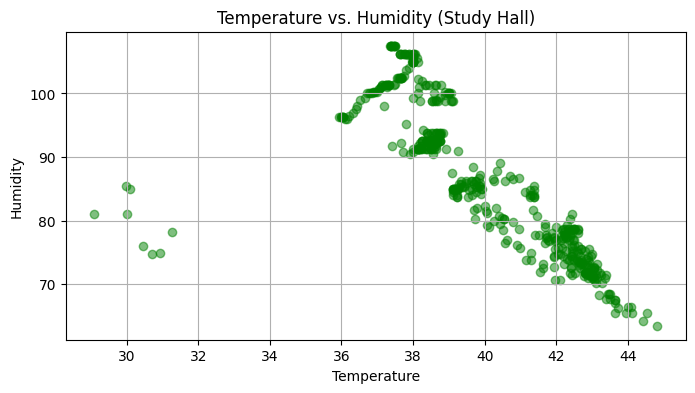

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(b3['Temperature'], b3['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (Study Hall)')
plt.grid(True)
plt.show()

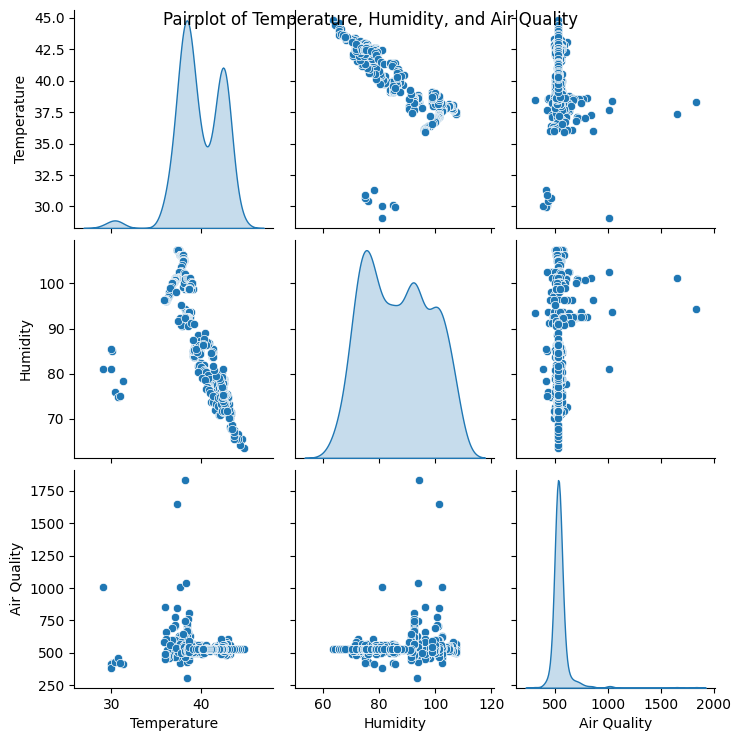

In [ ]:
sns.pairplot(b3[['Temperature', 'Humidity', 'Air Quality']], diag_kind='kde') # kde for diagonal
plt.suptitle('Pairplot of Temperature, Humidity, and Air Quality')
plt.show()

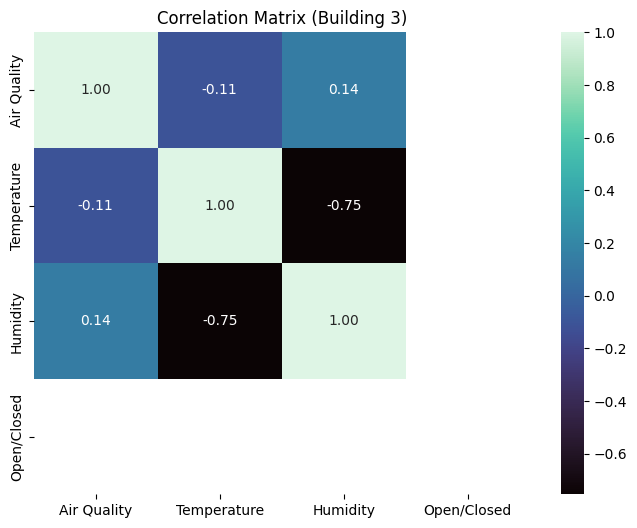

In [ ]:
# correlation matrix
correlation_matrix = b3[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Building 3)')
plt.show()

In [ ]:
X_b3 = b3[['Humidity']]
y_b3 = b3['Temperature']
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_b3, y_b3, test_size=0.2, random_state=42)

# create and train the linear regression model
b3_model = LinearRegression()
b3_model.fit(X_train, y_train)

# predictions on test set
b3_y_pred = b3_model.predict(X_test)

In [ ]:
# evaluate the model
b3_mse = mean_squared_error(y_test, b3_y_pred)
b3_r2 = r2_score(y_test, b3_y_pred)

print(f"Mean Squared Error: {b3_mse}")
print(f"R-squared: {b3_r2}")

Mean Squared Error: 1.9082756472427376
R-squared: 0.6971064746234028


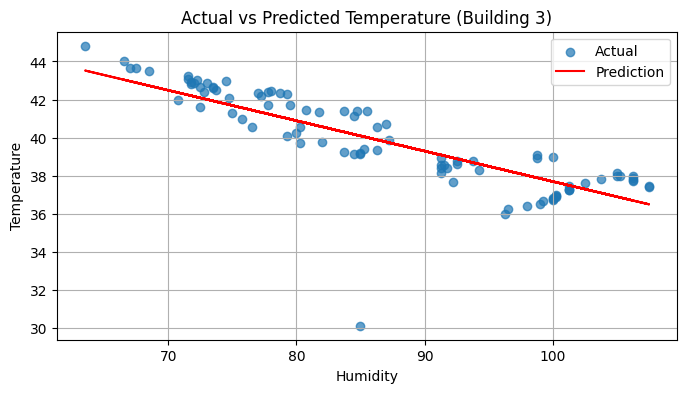

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], b3_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Building 3)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** There is a negative trend between the data points which means that as the humidity increases, the temperature value decreases.
- **Prediction:** The line gives us a reasonable fit, it captures the downward trend of the data points.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 1.91 which is the average squared difference between the actual and predicted values of the temperature. It suggests a reasonable accuracy given the range of the temperature values.
- **R-squared:** The value of r-squared being 0.6971 (approximately 70%) explains the variability of the temperature in the model. This shows us a moderately strong linear relationship between the temperature and humidity.

The linear regression model built using the data from Building 3 performs decently, it shows a strong negative correlation between humidity and temperature. Still, the prediction on temperature can still be improved because 30% of the variability is not captured by the model.


### **PE Center**

In [ ]:
pe = pd.read_csv(pec_fp)
pe.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 13:17,35.12,48.33,480.13,1
1,2024-11-04 13:27,35.74,45.40,428.99,1
2,2024-11-04 13:42,35.60,46.17,445.87,1
3,2024-11-04 13:50,36.03,45.50,451.22,1
4,2024-11-04 14:00,35.88,44.20,474.32,1


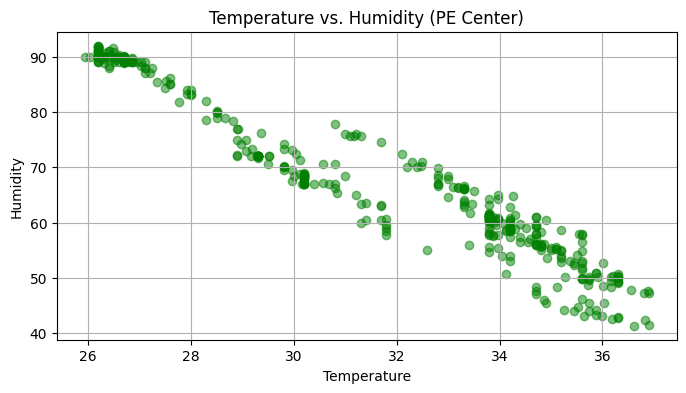

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(pe['Temperature'], pe['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (PE Center)')
plt.grid(True)
plt.show()

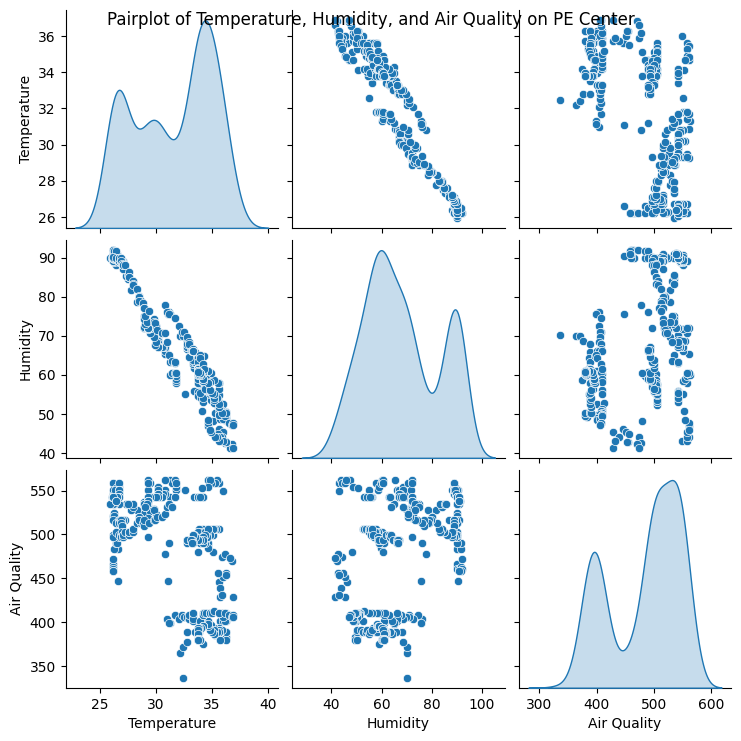

In [ ]:
sns.pairplot(pe[['Temperature', 'Humidity', 'Air Quality']], diag_kind='kde') # kde for diagonal
plt.suptitle('Pairplot of Temperature, Humidity, and Air Quality on PE Center')
plt.show()

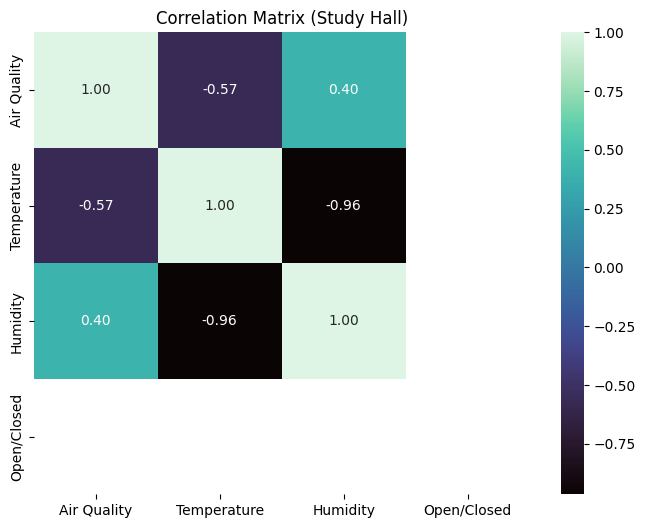

In [ ]:
# correlation matrix
correlation_matrix = pe[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Study Hall)')
plt.show()

In [ ]:
X_pe = pe[['Humidity']]
y_pe = pe['Temperature']

In [ ]:
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_pe, y_pe, test_size=0.2, random_state=42)

# create and train the linear regression model
pe_model = LinearRegression()
pe_model.fit(X_train, y_train)

# predictions on test set
pe_y_pred = pe_model.predict(X_test)

In [ ]:
# evaluate the model
pe_mse = mean_squared_error(y_test, pe_y_pred)
pe_r2 = r2_score(y_test, pe_y_pred)

print(f"Mean Squared Error: {pe_mse}")
print(f"R-squared: {pe_r2}")

Mean Squared Error: 0.8721630605281214
R-squared: 0.9283259967791657


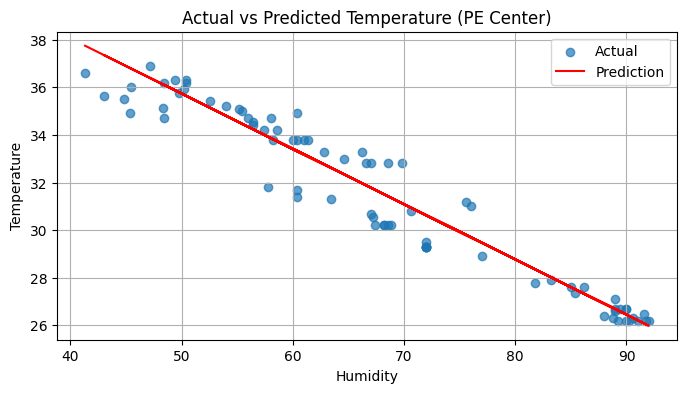

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], pe_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (PE Center)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** There is a strong negative trend with the data points that tells us that as humidity increases, the temperature value decreases in a more significant matter, compared to the data gathered in Building 3. This might be because the PE center is an open area with no air conditioning present.
- **Prediction:** The red line which represents the predictions fits the data points very closely, almost perfectly capturing the trend of the actual data.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 0.872 is very low. This suggests the average squared difference between the actual and predicted temperature values is small, this indicates an accurate prediction.
- **R-squared:** The r-squared value of 0.9283 (approximately 93%) is very high suggesting that 93% of the variability in the temperature data is explained by the model. It shows us an great fit for the data.

The PE Center linear regression model shows a very strong relationship between the humidity and temperature data. The low mse value and high r-squared value indicate that the predictions are highly reliable and the model is effective in capturing their relationship.

### **Library**

In [ ]:
lib = pd.read_csv(lib_fp)
lib.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 10:39,28.42,41.32,107.62,2
1,2024-11-04 10:44,28.32,40.96,114.16,2
2,2024-11-04 10:49,28.38,40.02,137.18,2
3,2024-11-04 10:54,28.52,40.68,157.71,2
4,2024-11-04 11:00,28.60,41.28,177.08,2


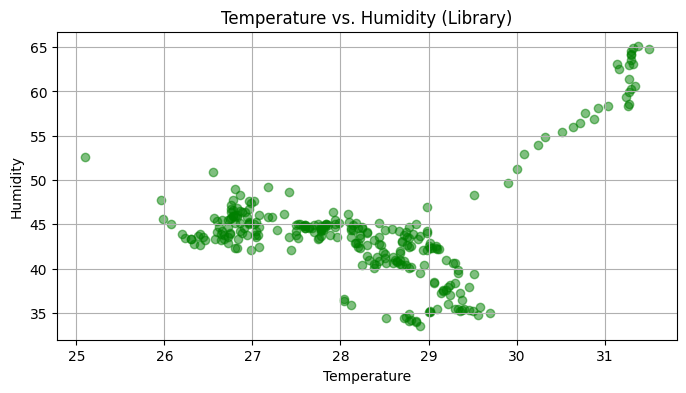

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(lib['Temperature'], lib['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (Library)')
plt.grid(True)
plt.show()

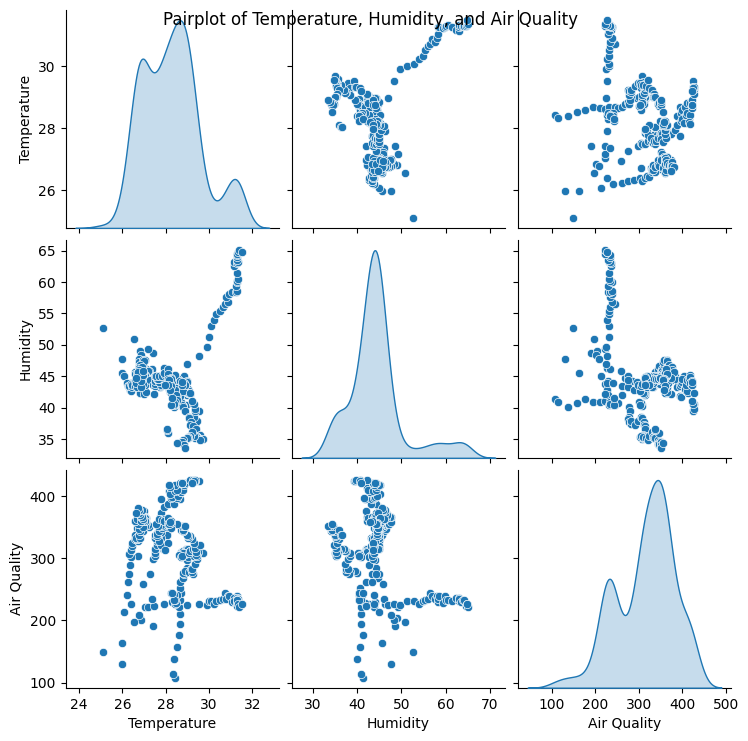

In [ ]:
sns.pairplot(lib[['Temperature', 'Humidity', 'Air Quality']], diag_kind='kde') # kde for diagonal
plt.suptitle('Pairplot of Temperature, Humidity, and Air Quality')
plt.show()

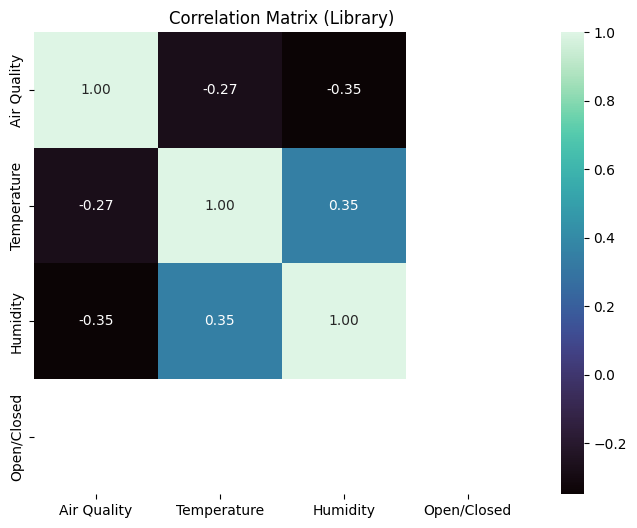

In [ ]:
# correlation matrix
correlation_matrix = lib[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Library)')
plt.show()

In [ ]:
X_lib = lib[['Humidity']]
y_lib = lib['Temperature']
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_lib, y_lib, test_size=0.2, random_state=42)

# create and train the linear regression model
lib_model = LinearRegression()
lib_model.fit(X_train, y_train)

# predictions on test set
lib_y_pred = lib_model.predict(X_test)

In [ ]:
# evaluate the model
lib_mse = mean_squared_error(y_test, lib_y_pred)
lib_r2 = r2_score(y_test, lib_y_pred)

print(f"Mean Squared Error: {lib_mse}")
print(f"R-squared: {lib_r2}")

Mean Squared Error: 1.5727220818667416
R-squared: 0.051018171943748136


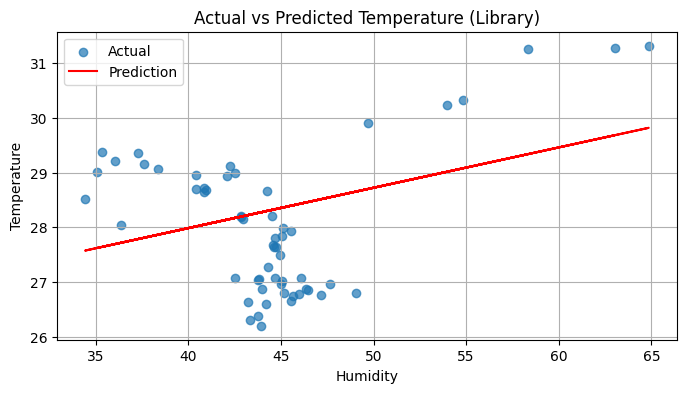

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], lib_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Library)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** The data captured in the library is highly scattered and displays no clear trend between the humidity and temperature values.
- **Prediction:** The red line which is the predicted temperature values shows a slight positive slope which means that there is a weak positive relationship between the humidity and temperature. But with looking at the scatter plot, the data points are widely spread which suggests a poorly fitted model.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 1.573 which is a moderate but is considered relatively higher to the small range of temperature values given in the data. This shows us a considerable average squared difference between the actual and predicted values of temperature.
- **R-squared:** The r-squared value is 0.051 (approximately 5%) which shows us that the model only explain 5% of the variability in the temperature data, this is very low. In this model, it fails to capture the relationship between the humidity and temperature.

The Library linear regression model does not effectively explain or predict the relationship between the humidity and temperature values. The low value of the r-squared and the scattered data points tells us that a linear model is not suitable for this data.

### **Study Hall**

In [ ]:
sh_data = pd.read_csv(sh_fp)
sh_data.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 13:17,35.12,48.33,480.13,1
1,2024-11-04 13:27,35.74,45.40,428.99,1
2,2024-11-04 13:42,35.60,46.17,445.87,1
3,2024-11-04 13:50,36.03,45.50,451.22,1
4,2024-11-04 14:00,35.88,44.20,474.32,1


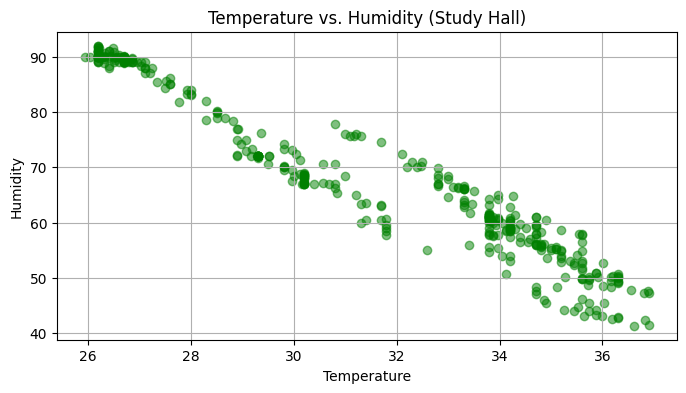

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(sh_data['Temperature'], sh_data['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (Study Hall)')
plt.grid(True)
plt.show()

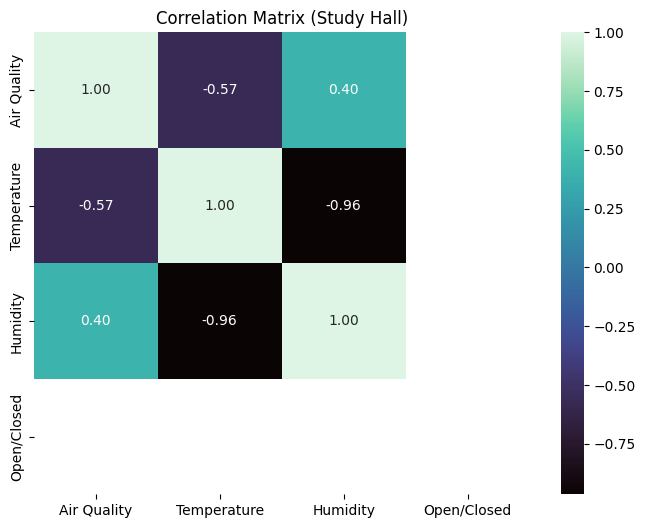

In [ ]:
# correlation matrix
correlation_matrix = sh_data[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Study Hall)')
plt.show()

In [ ]:
X_sh = sh_data[['Humidity']]
y_sh = sh_data['Temperature']

In [ ]:
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_sh, y_sh, test_size=0.2, random_state=42)

# create and train the linear regression model
sh_model = LinearRegression()
sh_model.fit(X_train, y_train)

# predictions on test set
sh_y_pred = sh_model.predict(X_test)

In [ ]:
# evaluate the model
sh_mse = mean_squared_error(y_test, sh_y_pred)
sh_r2 = r2_score(y_test, sh_y_pred)

print(f"Mean Squared Error: {sh_mse}")
print(f"R-squared: {sh_r2}")

Mean Squared Error: 0.8721630605281214
R-squared: 0.9283259967791657


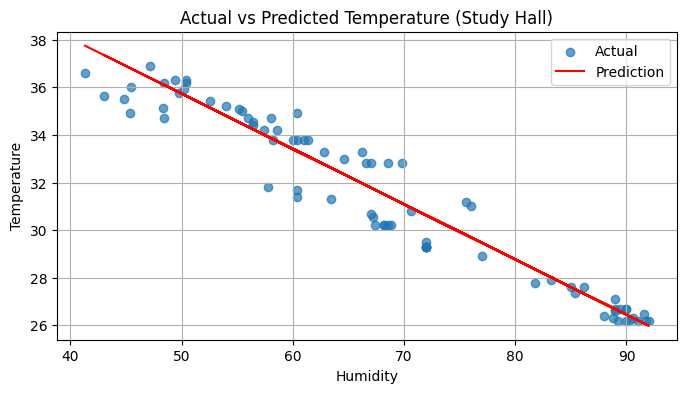

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], sh_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Study Hall)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** There is a strong negative trend in the actual data that tells us that as the humidity value increases, the temperature decreases. Just like the data measure in the PE Center, this might be because the Study Area is an open space no air conditioning in it.
- **Prediction:** Similar with the PE Center prediction line, it almost perfectly fit the trend of the actual data values.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 0.8722 is relatively low which tells us that the model's predictions are accurate.
- **R-squared:** The r-squared value is 0.9283 (approximately 93%) which is a high value to have that suggests that the variation in temperature can be explained by the variation in the humidity.

The Study Hall linear regression model tells us that the humidity and temperature are negatively correlated. The model provides a good fit to the data and can accurately predict temperature values based on the humidity. Still, further improvement and analysis can show us a deeper understanding in the relationship between the two variables.


### **Anniversary Hall (Garden)**

In [ ]:
anniv_data = pd.read_csv(anniv_fp)
anniv_data.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 12:43,30.40,67.83,621.5,1
1,2024-11-04 12:49,31.50,62.60,358.8,1
2,2024-11-04 12:54,31.50,63.20,301.0,1
3,2024-11-04 12:59,31.68,62.60,260.4,1
4,2024-11-04 13:00,31.68,62.60,260.4,1


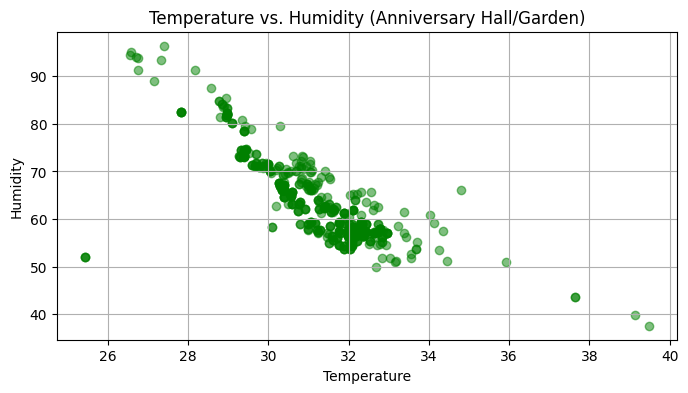

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(anniv_data['Temperature'], anniv_data['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (Anniversary Hall/Garden)')
plt.grid(True)
plt.show()

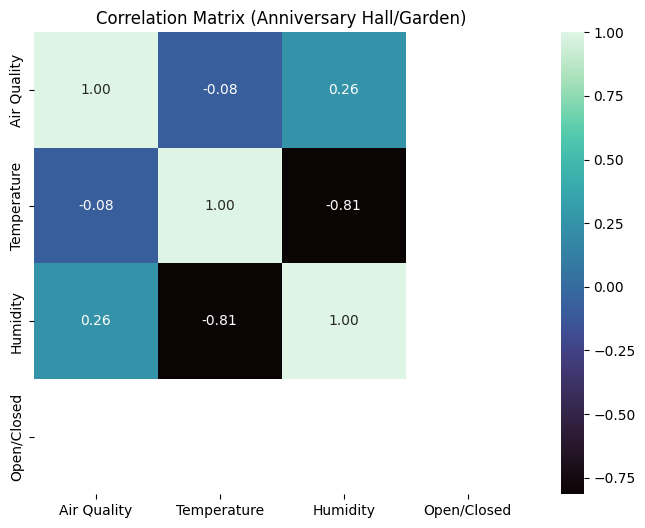

In [ ]:
# correlation matrix
correlation_matrix = anniv_data[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Anniversary Hall/Garden)')
plt.show()

In [ ]:
X_anniv = anniv_data[['Humidity']]
y_anniv = anniv_data['Temperature']

In [ ]:
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_anniv, y_anniv, test_size=0.2, random_state=42)

# create and train the linear regression model
anniv_model = LinearRegression()
anniv_model.fit(X_train, y_train)

# predictions on test set
anniv_y_pred = anniv_model.predict(X_test)

In [ ]:
# evaluate the model
anniv_mse = mean_squared_error(y_test, anniv_y_pred)
anniv_r2 = r2_score(y_test, anniv_y_pred)

print(f"Mean Squared Error: {anniv_mse}")
print(f"R-squared: {anniv_r2}")

Mean Squared Error: 0.9282169848827535
R-squared: 0.6130771842888392


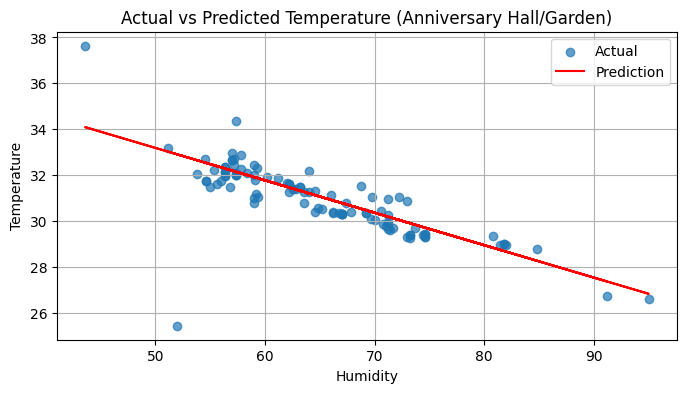

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], anniv_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Anniversary Hall/Garden)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** The actual data shows us a general negative correlation between the humidity and temperature values. Just like some of our models, as the humidity increase, the temperature decreases.
- **Prediction:** The red line that represents the prediction of our model fits our data but it is not perfect for there are some data that is too far from the prediction line.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 0.9282 which higher that the previous linear regression model (Study Hall) and this tells us that the mode's predictions are less accurate.
- **R-squared:** The r-squared value is 0.6130 (approximately 61%) which is lower than the model when the Study Hall dataset is used, indicating that only 61% of the variation in the temperature can be explained by the variation in the humidity.

The Anniversary Hall/Garden linear regression model shows us the negative correlation of the humidity and temperature but it is weaker compared to the model produced using the Study Hall dataset because there is more scatter present in the data. However, the model still provides a reasonable fit to the data provided.

### Merged Data

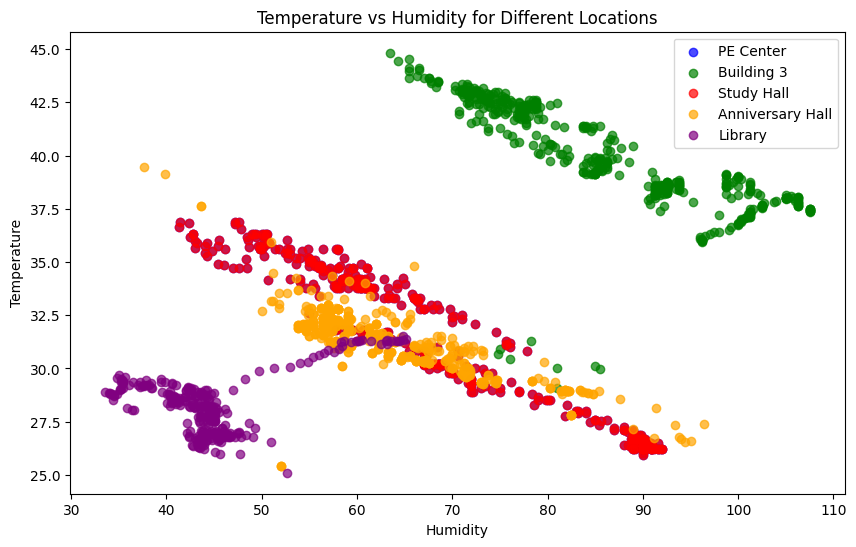

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(pe['Humidity'], pe['Temperature'], label='PE Center', alpha=0.7, color='blue')
plt.scatter(b3['Humidity'], b3['Temperature'], label='Building 3', alpha=0.7, color='green')
plt.scatter(sh_data['Humidity'], sh_data['Temperature'], label='Study Hall', alpha=0.7, color='red')
plt.scatter(anniv_data['Humidity'],anniv_data['Temperature'], label='Anniversary Hall', alpha=0.7, color='orange')
plt.scatter(lib['Humidity'], lib['Temperature'], label='Library', alpha=0.7, color='purple')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature vs Humidity for Different Locations')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
merged_data = pd.read_csv(merged_fp)
merged_data.head()

,Date,Temperature,Humidity,Air Quality,Open/Closed
0,2024-11-04 12:43,30.40,67.83,621.5,1
1,2024-11-04 12:49,31.50,62.60,358.8,1
2,2024-11-04 12:54,31.50,63.20,301.0,1
3,2024-11-04 12:59,31.68,62.60,260.4,1
4,2024-11-04 13:00,31.68,62.60,260.4,1


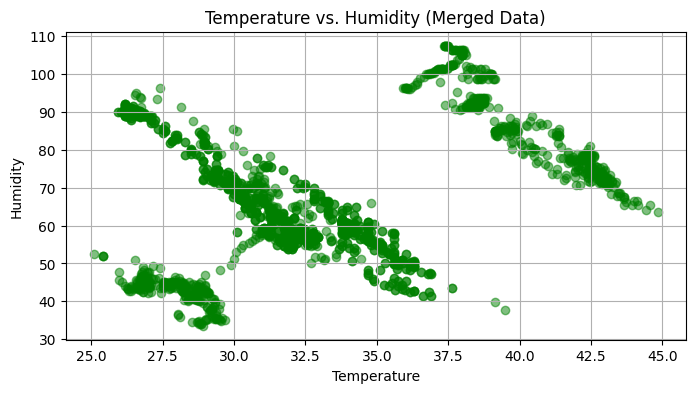

In [ ]:
# scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(merged_data['Temperature'], merged_data['Humidity'], alpha=0.5, color='green')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity (Merged Data)')
plt.grid(True)
plt.show()

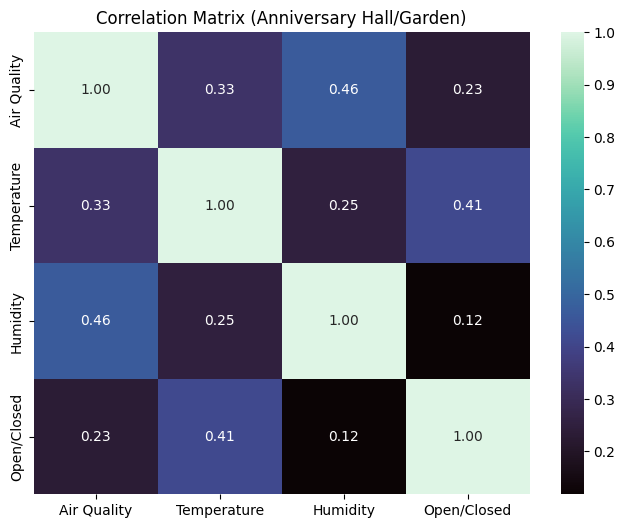

In [ ]:
# correlation matrix
correlation_matrix = merged_data[['Air Quality', 'Temperature', 'Humidity', 'Open/Closed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Anniversary Hall/Garden)')
plt.show()

In [ ]:
X_merged = merged_data[['Humidity']]
y_merged = merged_data['Temperature']

In [ ]:
# linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X_merged, y_merged, test_size=0.2, random_state=42)

# create and train the linear regression model
merged_model = LinearRegression()
merged_model.fit(X_train, y_train)

# predictions on test set
merged_y_pred = merged_model.predict(X_test)

In [ ]:
# evaluate the model
merged_mse = mean_squared_error(y_test, merged_y_pred)
merged_r2 = r2_score(y_test, merged_y_pred)

print(f"Mean Squared Error: {merged_mse}")
print(f"R-squared: {merged_r2}")

Mean Squared Error: 18.40570119271827
R-squared: 0.025487285133930726


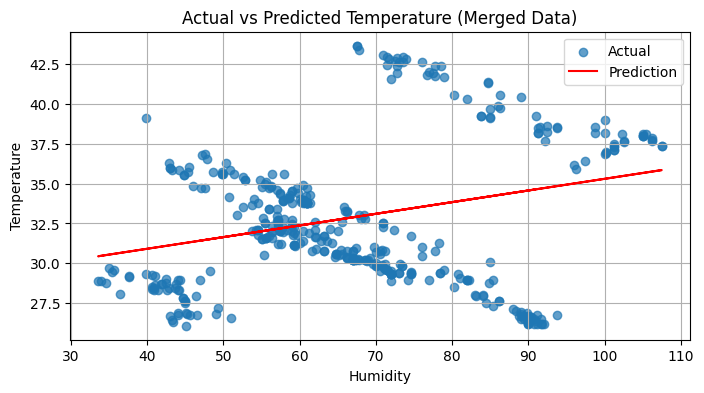

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Humidity'], y_test, label='Actual', alpha=0.7)
plt.plot(X_test['Humidity'], merged_y_pred, color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Merged Data)')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

**Scatter Plot**
- **Actual Data:** The actual data doesn't show a strong linear relationship between the humidity and temperature. We can see that the data points are all scattered and has no pattern in it. There are a few outliers and some form a few clusters.
- **Prediction:** The red line which is the predicted data values are high inaccurate, following nothing in the actual data.

**Metrics**
- **Mean Squared Error (MSE):** The mse value is 18.4057 which is a significantly high value to have. This tells us that the model's predictions are not accurate at all.
- **R-squared:** The r-squared value is 0.0255 (approximately 2%) which tells us that only 2% of the variation in temperature can be explained by the variation in humidity. This value is very low to have which suggests that the model is not a good fit for the data.

The Merged Data linear regression model suggests that there is little to no linear relationship between the humidity and temperature. The scatter plot gives us a randomly distributed data points which means that humidity is not a good predictor of temperature. This just means that a linear regression model is not a good fit for the dataset used.


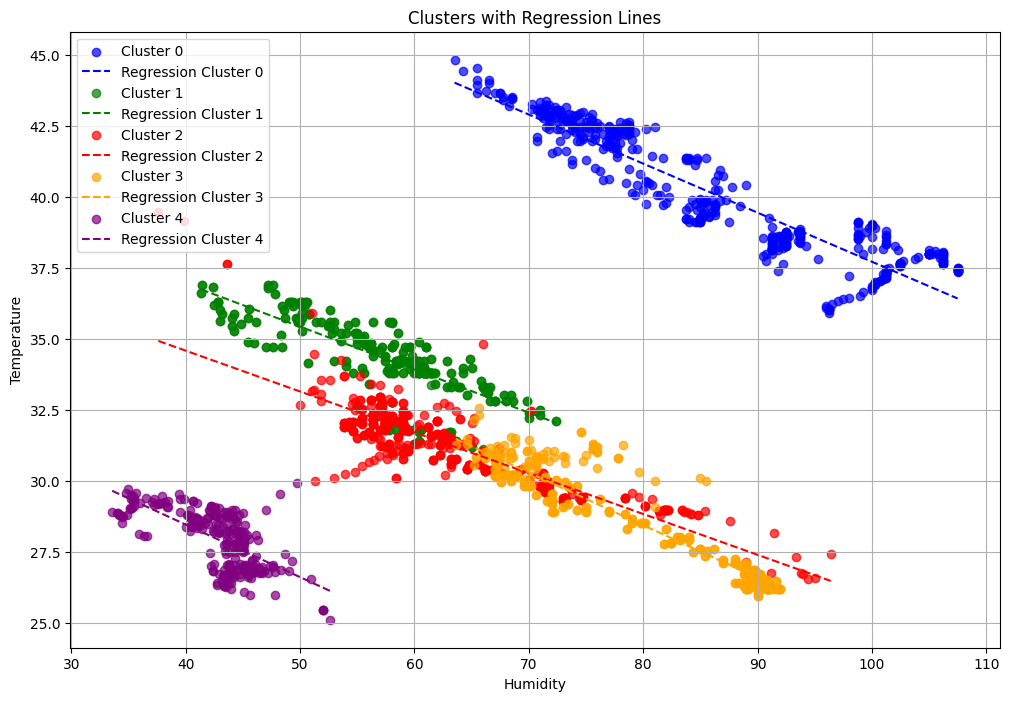

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing: Drop irrelevant columns
data = merged_data.drop(['Date', 'Open/Closed'], axis=1)

# Handle missing or infinite values
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
data.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters back to the original DataFrame
df = merged_data.loc[data.index]  # Keep only cleaned rows
df['Cluster'] = clusters

# Visualization with regression for each cluster
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i in range(5):
    cluster_data = df[df['Cluster'] == i]

    # Extract features and target for regression
    X = cluster_data[['Humidity']].values  # Independent variable
    y = cluster_data['Temperature'].values  # Dependent variable

    # Fit a linear regression model
    reg = LinearRegression()
    reg.fit(X, y)

    # Generate predictions for plotting regression line
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(X_range)

    # Scatter plot for cluster data
    plt.scatter(cluster_data['Humidity'], cluster_data['Temperature'],
                label=f'Cluster {i}', alpha=0.7, color=colors[i])

    # Plot regression line
    plt.plot(X_range, y_pred, color=colors[i], linestyle='--',
             label=f'Regression Cluster {i}')

# Add labels, title, and legend
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Clusters with Regression Lines')
plt.legend()
plt.grid(True)
plt.show()

#### **Interpretation**

This graph shows us the clustering of data points with a regression line for each cluster.

**Clusters:** The data points are divided into 5 different clusters. These clusters are groups of data points that have similar characteristics based on the humidity and temperature values, it is not based on the location where the data is taken.

**Regression Line:** Each cluster has a regression line associated to them that shows the trend of the humidity and temperature and their relationship within a specific cluster. There are negative slopes that shows the inverse relationship of the humidity and temperature and the steepness of it indicates the strength of this relationship.

- **Blue Cluster:** The regression line has a negative trend to it that shows us that with a higher temperature value, the humidity decreases.
- **Green Cluster:** The regression line indicates a negative correlation as well with moderate temperature and humidity values.
- **Red Cluster:** The regression line has quite a steep downward trend and is centered around moderate temperature and a higher humidity values.
- **Orange Cluster:** The regression line has a similar downward trend and has a higher humidity and lower temperature compared to the red cluster group.
- **Purple Cluster:** The regression line here shows a less steep downward trend with a low temperature and a low-to-moderate humidity values.

All cluster groups' regression line shows us that as humidity increases the temperature value tends to decrease. The clusters suggests different environment where the data points are taken which is the different locations that are assigned to each group where the merged dataset is created from.


## **Conclusion**

In conclusion, this case study highlights the relationship between the temperature and humidity values across the TIP campus by analyzing environmental data that we collected. Not only we were able to practice preprocessing steps that includes handling missing values in order to ensure that the dataset was clean and suitable for modeling. We were also able to apply our knowledge in embedded system by creating a product that automatically collects temperature, humidity and air quality data from the surrounding of our designated location.

We made a linear regression model for each separate datasets in order to see the relationship of the temperature and humidity on each specific location. For the merged dataset, clustering revealed 5 distinct groups that emphasize the unique environmental characteristics for each location. Linear regression models on the other hand is then developed for each cluster to predict temperature based on the humidity, and a generalized regression model was created using the merged dataset. This approach provided us insights while also addressing campus-wide trends based on the different location where the data was taken.

The regression analysis demonstrated a consistent inverse relationship between the temperature and humidity across all locations, with localized models offering better predictive accuracy due to their specificity. Some models are less precise but this just provided us with an overarching perspective of the environmental trends across the campus. By combining cluster-specific and generalized models, we were able to see practice skills that we have learned throughout the course of this semester and actually utilize it in a dataset that we created ourselves.


## **Recommendation**

In working with the datasets collected, we recommend creating separate models for each individual dataset rather than merging all of them into a single linear regression model. Merging the datasets does not align well with the assumptions of linear regression due to the unique behaviors and operating environments of each location, this impacts the relationship between the values of the temperature and humidity. Instead, we tried clustering which appeared to be a more suitable approach in analyzing the merged data, it accounts for the distinct characteristics of each location and it enabled us to have a more accurate result when looking into specific environmental patterns.
